In [ ]:
from google.colab import files
uploaded = files.upload()

Saving musae_git_edges.csv to musae_git_edges (1).csv
Saving musae_git_target.csv to musae_git_target (1).csv


In [ ]:
import io
import pandas as pd
import numpy as np
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import scipy.stats as sp
from collections import Counter
import seaborn as sns
import community.community_louvain as community_louvain
import networkx.algorithms.community as nx_comm
from collections import defaultdict
from community.community_louvain import induced_graph

In [ ]:
nodes = pd.read_csv(io.BytesIO(uploaded['musae_git_target (1).csv']))
edges = pd.read_csv(io.BytesIO(uploaded['musae_git_edges (1).csv']))

nodes.head()

,id,name,ml_target
0,0,Eiryyy,0
1,1,shawflying,0
2,2,JpMCarrilho,1
3,3,SuhwanCha,0
4,4,sunilangadi2,1


In [ ]:
#count the number of machine learning developers and web developers
ml_web_counts = nodes['ml_target'].value_counts()
print(ml_web_counts)

ml_target
0    27961
1     9739
Name: count, dtype: int64


In [ ]:
edges.head()

,id_1,id_2
0,0,23977
1,1,34526
2,1,2370
3,1,14683
4,1,29982


In [ ]:
edges.columns = ['from','to']
edges.head()

,from,to
0,0,23977
1,1,34526
2,1,2370
3,1,14683
4,1,29982


In [ ]:
#create graph
graph = nx.Graph()
graph.add_nodes_from(nodes["id"])
graph.add_edges_from(zip(edges['from'], edges['to']))
print(graph)

Graph with 37700 nodes and 289003 edges


In [ ]:
nx.set_node_attributes(graph, nodes["ml_target"], "ml-web")

density = nx.density(graph)
print(f'Density: {density}')

Density: 0.0004066878203117068


In [ ]:
graph_degree_dict = dict(graph.degree)
graph_degree_list = list(dict(graph.degree()).values())

print('Min degree:',np.min(graph_degree_list))
print('Max degree:',np.max(graph_degree_list))
print('Mean degree:',np.mean(graph_degree_list))
print('Median degree:',np.median(graph_degree_list))
print('Standard deviation:',np.std(graph_degree_list))

Min degree: 1
Max degree: 9458
Mean degree: 15.331724137931035
Median degree: 6.0
Standard deviation: 80.78703073980464


Text(0, 0.5, 'ECDF')

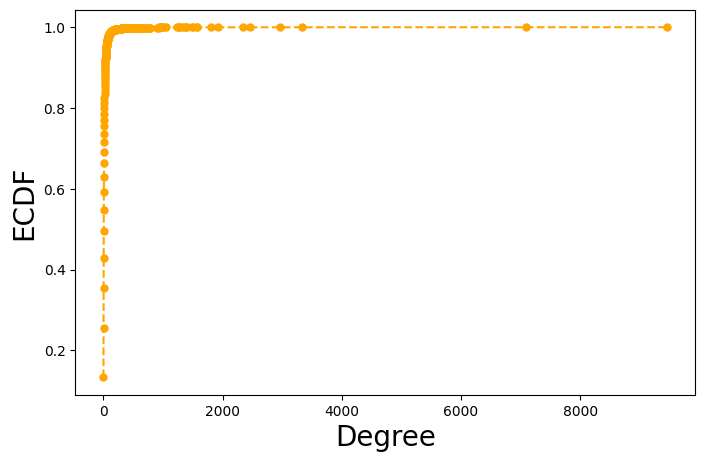

In [ ]:
# ECDF in linear scale
cdf_function = ECDF(graph_degree_list)
x = np.unique(graph_degree_list)
y = cdf_function(x)
fig_cdf_function = plt.figure(figsize=(8,5))
axes = fig_cdf_function.gca()
axes.plot(x,y,color = 'orange', linestyle = '--', marker= 'o',ms = 5)
axes.set_xlabel('Degree',size = 20)
axes.set_ylabel('ECDF',size = 20)

Text(0, 0.5, 'ECDF')

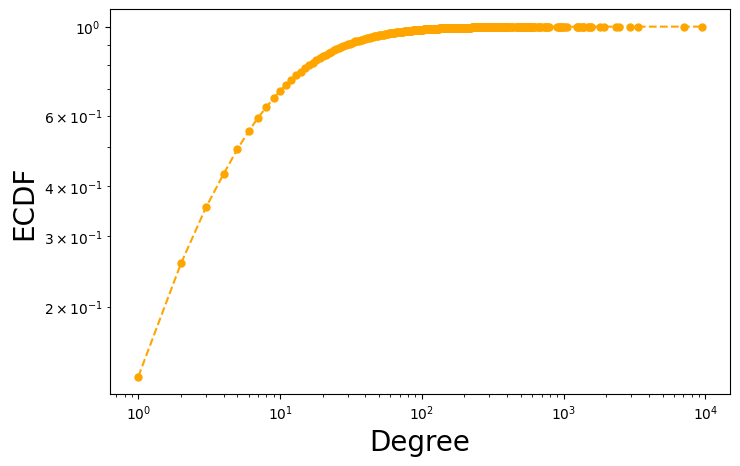

In [ ]:
# ECDF in loglog scale
fig_cdf_function = plt.figure(figsize=(8,5))
axes = fig_cdf_function.gca()
axes.loglog(x,y,color = 'orange', linestyle = '--', marker= 'o',ms = 5)
axes.set_xlabel('Degree',size = 20)
axes.set_ylabel('ECDF',size = 20)

Text(0, 0.5, 'ECCDF')

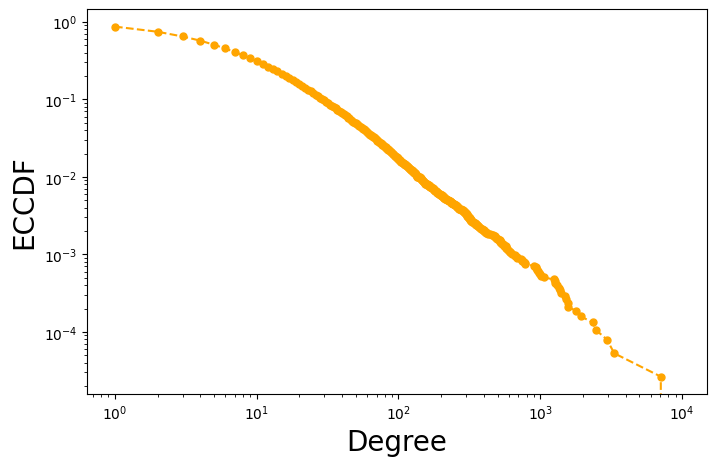

In [ ]:
# ECCDF in loglog scale
y = 1-cdf_function(x)
fig_ccdf_function = plt.figure(figsize=(8,5))
axes = fig_ccdf_function.gca()
axes.loglog(x,y,color = 'orange', linestyle = '--', marker= 'o',ms = 5)
axes.set_xlabel('Degree',size = 20)
axes.set_ylabel('ECCDF',size = 20)

In [ ]:
mean_degree = np.mean(graph_degree_list)

p = mean_degree / (graph.order()-1)

random_graph = nx.fast_gnp_random_graph(graph.order(),p)

print('Number of nodes: {}'.format(random_graph.order()))
print('Number of links: {}'.format(random_graph.size()))

Number of nodes: 37700
Number of links: 288170


In [ ]:
random_degree = list(dict(random_graph.degree()).values())

Text(0, 0.5, 'ECCDF')

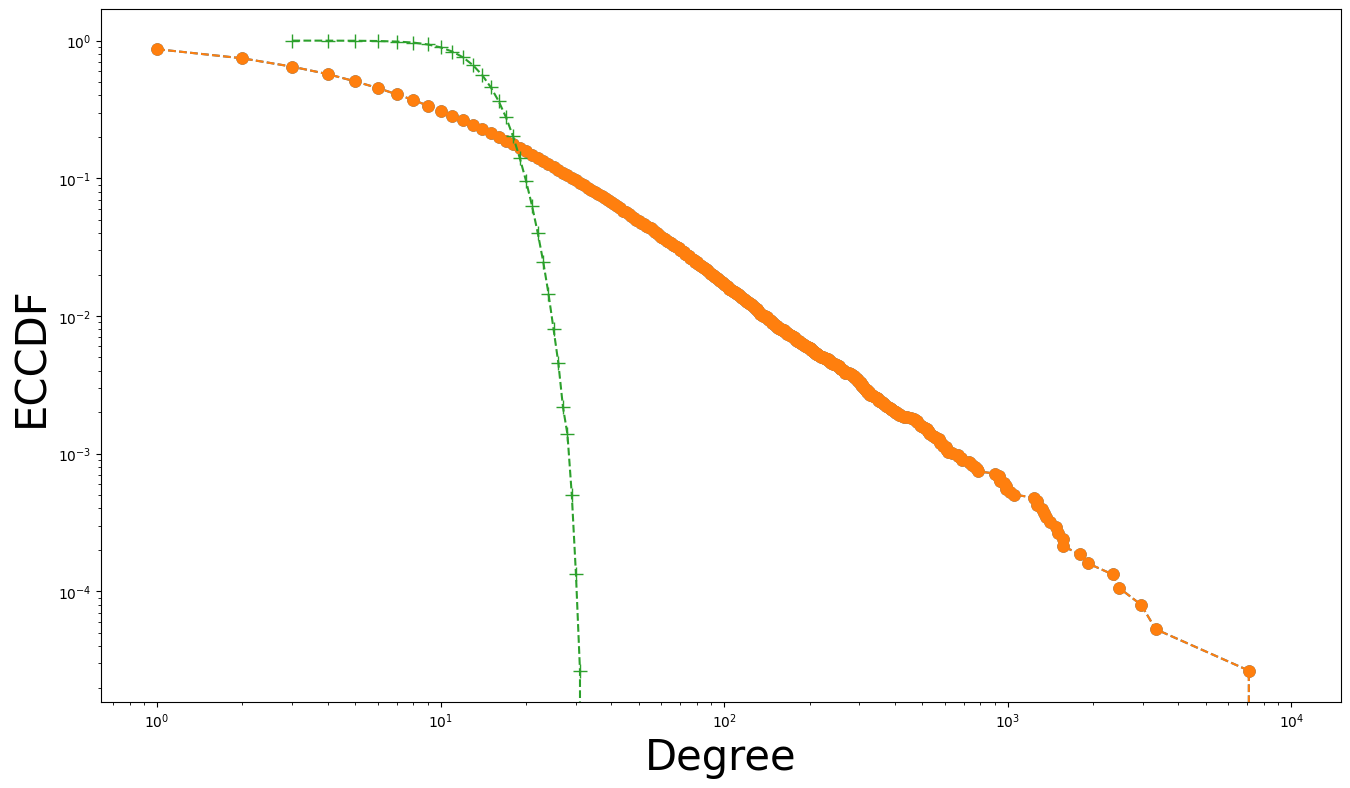

In [ ]:
cdf = ECDF(graph_degree_list)
x = np.unique(graph_degree_list)
y = cdf(x)
cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)
fig_cdf = plt.figure(figsize=(16,9))
assi = fig_cdf.gca()
assi.set_xscale('log')
assi.set_yscale('log')
assi.loglog(x,1-y,marker='o',ms=8, linestyle='--')
assi.loglog(x,1-y,marker='o',ms=8, linestyle='--')
assi.plot(x_random,1-y_random,marker='+',ms=10, linestyle='--')
assi.set_xlabel('Degree',size=30)
assi.set_ylabel('ECCDF', size = 30)

In [ ]:
percentile_99 = np.percentile(graph_degree_list,99)
print(percentile_95)

138.01000000000204


In [ ]:
hub = [k for k,v in dict(graph.degree()).items() if v>= percentile_99]
print(hub)
print(len(hub))

[73, 94, 494, 848, 974, 1030, 1085, 1089, 1095, 1164, 1295, 1445, 1483, 1526, 1923, 1979, 2078, 2152, 2281, 2300, 2347, 2397, 2431, 2442, 2635, 2896, 3153, 3491, 3712, 3922, 3990, 4001, 4128, 4174, 4210, 4333, 4370, 4447, 4757, 4793, 4847, 5061, 5188, 5210, 5300, 5315, 5323, 5506, 5547, 5629, 5673, 6005, 6134, 6149, 6165, 6183, 6229, 6301, 6578, 6631, 6645, 6790, 7006, 7027, 7075, 7104, 7195, 7211, 7213, 7267, 7317, 7339, 7491, 7513, 7562, 7598, 7631, 7825, 7976, 8054, 8357, 8518, 8635, 8753, 9008, 9051, 9395, 9532, 9553, 9633, 9677, 9780, 10001, 10080, 10154, 10403, 10568, 10595, 10830, 10840, 11051, 11081, 11225, 11242, 11271, 11273, 11279, 11534, 11573, 11588, 11814, 11927, 12209, 12280, 12461, 12505, 12978, 13028, 13058, 13365, 13504, 13598, 13638, 13647, 13656, 13708, 13719, 13838, 13857, 13883, 13998, 14003, 14176, 14242, 14400, 14670, 14865, 14954, 15074, 15115, 15191, 15192, 15313, 15405, 15460, 15554, 15669, 15750, 15906, 15940, 15994, 16098, 16119, 16321, 16390, 16496, 16631,

In [ ]:
print(list(nx.isolates(graph)))

[]


In [ ]:
#connectivity
print(nx.is_connected(graph))
print(nx.number_connected_components(graph))

True
1


In [ ]:
largest_cc = max(nx.connected_components(graph), key=len)
print(len(largest_cc))

37700


In [ ]:
#bridges
nx.has_bridges(graph)


True

In [ ]:
#transitivity
print('graph - transitivity: {}'.format(nx.transitivity(graph)))

graph - transitivity: 0.012357188884259466


In [ ]:
nx.average_clustering(graph), np.median(list(nx.triangles(graph).values()))

(0.16753704480107237, 2.0)

In [ ]:
#attribute assortativity
nx.attribute_assortativity_coefficient(graph, attribute= "ml-web", nodes=None)

0.3778215022223345

In [ ]:
MM_attribute = nx.attribute_mixing_matrix(graph, attribute = "ml-web", nodes=None, mapping=None, normalized=True)

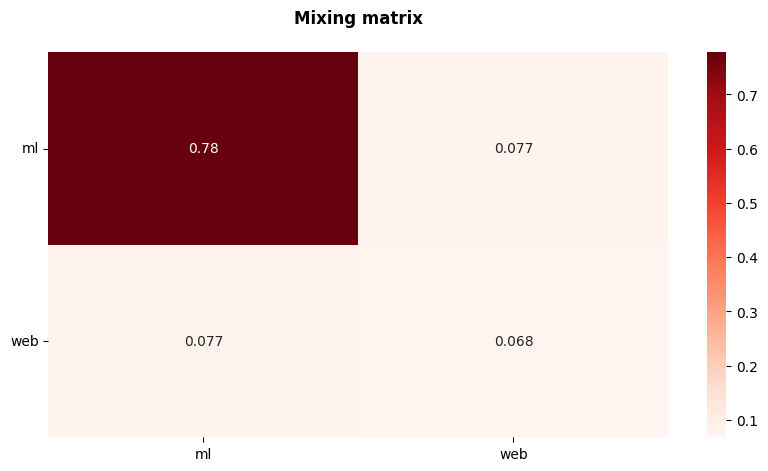

In [ ]:
plt.figure(figsize = (10,5))
clusters = ['ml', 'web']
sns.heatmap(pd.DataFrame(MM_attribute),annot = True,cmap = 'Reds')
plt.xticks([x+0.5 for x in range(2)],clusters, rotation = 0)
plt.yticks([x+0.5 for x in range(2)],clusters, rotation = 0)
plt.title('Mixing matrix\n', weight = 'bold')
plt.show()

#The MM says that the 78% of the edges are between nodes with ml
#This means that 78% of all the edges in the network connect two nodes that are both labeled as machine learning developers
#This result indicates a high degree of homophily among machine learning developers in the network.
#Homophily refers to the tendency of individuals to associate and bond with similar others.
#In this context, it means that machine learning developers are much more likely to follow or be followed by other machine learning developers compared to web developers.
# A high percentage of edges between nodes of the same type suggests a strong community structure within the group of machine learning developers.
# This can imply tight-knit sub-networks or clusters of machine learning developers within the overall GitHub network.
# In a network with high homophily, information (e.g., about repositories, tools, and techniques) might circulate more within a specific group and less between different groups.
# Understanding assortativity and homophily can help in designing targeted interventions or marketing strategies. For example, if a new machine learning tool is to be promoted, focusing on this densely connected group might be more effective.

In [ ]:
#degree assortativity
#Do nodes with similar degree tend to be more connected?
nx.degree_assortativity_coefficient(graph)

#The value is slightly negative, suggesting a weak tendency for nodes to connect to other nodes with different degrees.
# this means that there is a slight preference for developers with many connections (high-degree nodes) to connect with developers who have fewer connections (low-degree nodes), and vice versa.
#The slight negative assortativity might indicate that the network is somewhat heterogeneous, with connections spanning across different levels of node connectivity.
#This could imply a diverse range of interactions between highly connected and less connected developers.
#Community Dynamics: In the context of GitHub, this could reflect the way developers follow each other. High-profile developers (with many followers) might be followed by a mix of other high-profile and less-known developers, and vice versa.
#

-0.07521713413904481

In [ ]:
#degree centrality
#Definition: The number of edges connected to a node
#Nodes with high degree centrality are those with many connections. these might be developers who follow or are followed by many others, indicating their popularity or reach within the community.
degree_centrality = nx.degree_centrality(graph)
degree_centrality

{0: 2.6525902543834053e-05,
 1: 0.00021220722035067242,
 2: 2.6525902543834053e-05,
 3: 0.00013262951271917026,
 4: 5.3051805087668106e-05,
 5: 2.6525902543834053e-05,
 6: 0.0001591554152630043,
 7: 0.00021220722035067242,
 8: 0.00021220722035067242,
 9: 0.00018568131780683837,
 10: 0.0017507095678930475,
 11: 5.3051805087668106e-05,
 12: 0.0001591554152630043,
 13: 7.957770763150216e-05,
 14: 0.00047746624578901296,
 15: 0.00047746624578901296,
 16: 2.6525902543834053e-05,
 17: 7.957770763150216e-05,
 18: 7.957770763150216e-05,
 19: 0.0005835698559643491,
 20: 0.00010610361017533621,
 21: 0.0008753547839465238,
 22: 0.00018568131780683837,
 23: 0.0003183108305260086,
 24: 0.00047746624578901296,
 25: 0.00037136263561367674,
 26: 0.00018568131780683837,
 27: 0.0018568131780683837,
 28: 2.6525902543834053e-05,
 29: 5.3051805087668106e-05,
 30: 0.0001591554152630043,
 31: 0.00018568131780683837,
 32: 5.3051805087668106e-05,
 33: 5.3051805087668106e-05,
 34: 0.00010610361017533621,
 35: 0

In [ ]:
#community detection
#community detection : To identify the modular structure of the network by partitioning the network into communities.
#Greedy Modularity Maximization: This algorithm attempts to maximize the modularity score of the graph, which measures the density of edges inside communities as compared to edges between communities.
#The greedy approach incrementally builds communities by repeatedly joining pairs of communities that result in the greatest increase in modularity.
#A module, or community, is a subset of nodes within a network that are more densely interconnected internally than with the rest of the network.
# Modularity is a measure of the strength of the division of a network into modules (communities). It quantifies the density of links inside communities compared to links between communities.
list_community_sets_greedy = list(nx_comm.greedy_modularity_communities(graph))
print(list_community_sets_greedy)
#each set represents a community and contains the nodes that belong to that community

[frozenset({0, 32769, 2, 5, 6, 7, 32777, 10, 32779, 32780, 12, 32781, 32782, 16, 17, 18, 19, 21, 32790, 23, 32792, 22, 24, 32793, 28, 32794, 32798, 30, 32800, 32799, 32806, 39, 32808, 32809, 40, 42, 32814, 32816, 50, 32818, 32819, 53, 54, 55, 32823, 32824, 32825, 57, 58, 32828, 61, 63, 32832, 32834, 32836, 70, 32839, 32841, 73, 32845, 32848, 32850, 32852, 85, 87, 91, 92, 93, 95, 96, 97, 98, 32867, 100, 32868, 102, 32874, 32875, 32876, 32877, 32879, 32880, 32881, 32884, 119, 120, 32890, 122, 32892, 32894, 32895, 128, 32901, 32902, 134, 32904, 32905, 32907, 140, 141, 32910, 143, 144, 32915, 32916, 150, 32919, 32921, 154, 156, 32925, 32926, 32924, 160, 32927, 32930, 32932, 32933, 164, 32936, 32939, 175, 32945, 178, 32947, 32948, 181, 185, 186, 32955, 188, 32957, 190, 32960, 192, 32961, 195, 196, 194, 32965, 200, 32969, 32970, 32972, 32974, 32975, 209, 32977, 211, 32980, 32981, 216, 219, 32988, 221, 222, 32992, 32994, 32995, 227, 230, 231, 32999, 33002, 236, 237, 240, 241, 33010, 243, 244,

In [ ]:
len(list_community_sets_greedy)

450

In [ ]:
partition_louvain = community_louvain.best_partition(graph)

In [ ]:
len(set(partition_louvain.values()))

41

In [ ]:
list_community_sets_louvain= defaultdict(set)
for n, comm in partition_louvain.items():
    list_community_sets_louvain[comm].add(n)

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(pd.DataFrame(quality),annot = True, cmap = 'coolwarm', fmt = '.3')
plt.xticks([x+0.5 for x in range(3)],['Coverage','Modularity','Performance'], rotation = 0)
plt.yticks([x+0.5 for x in range(2)],method_names, rotation = 0)
plt.title('Community detection algorithm quality\n', weight = 'bold')
plt.show()

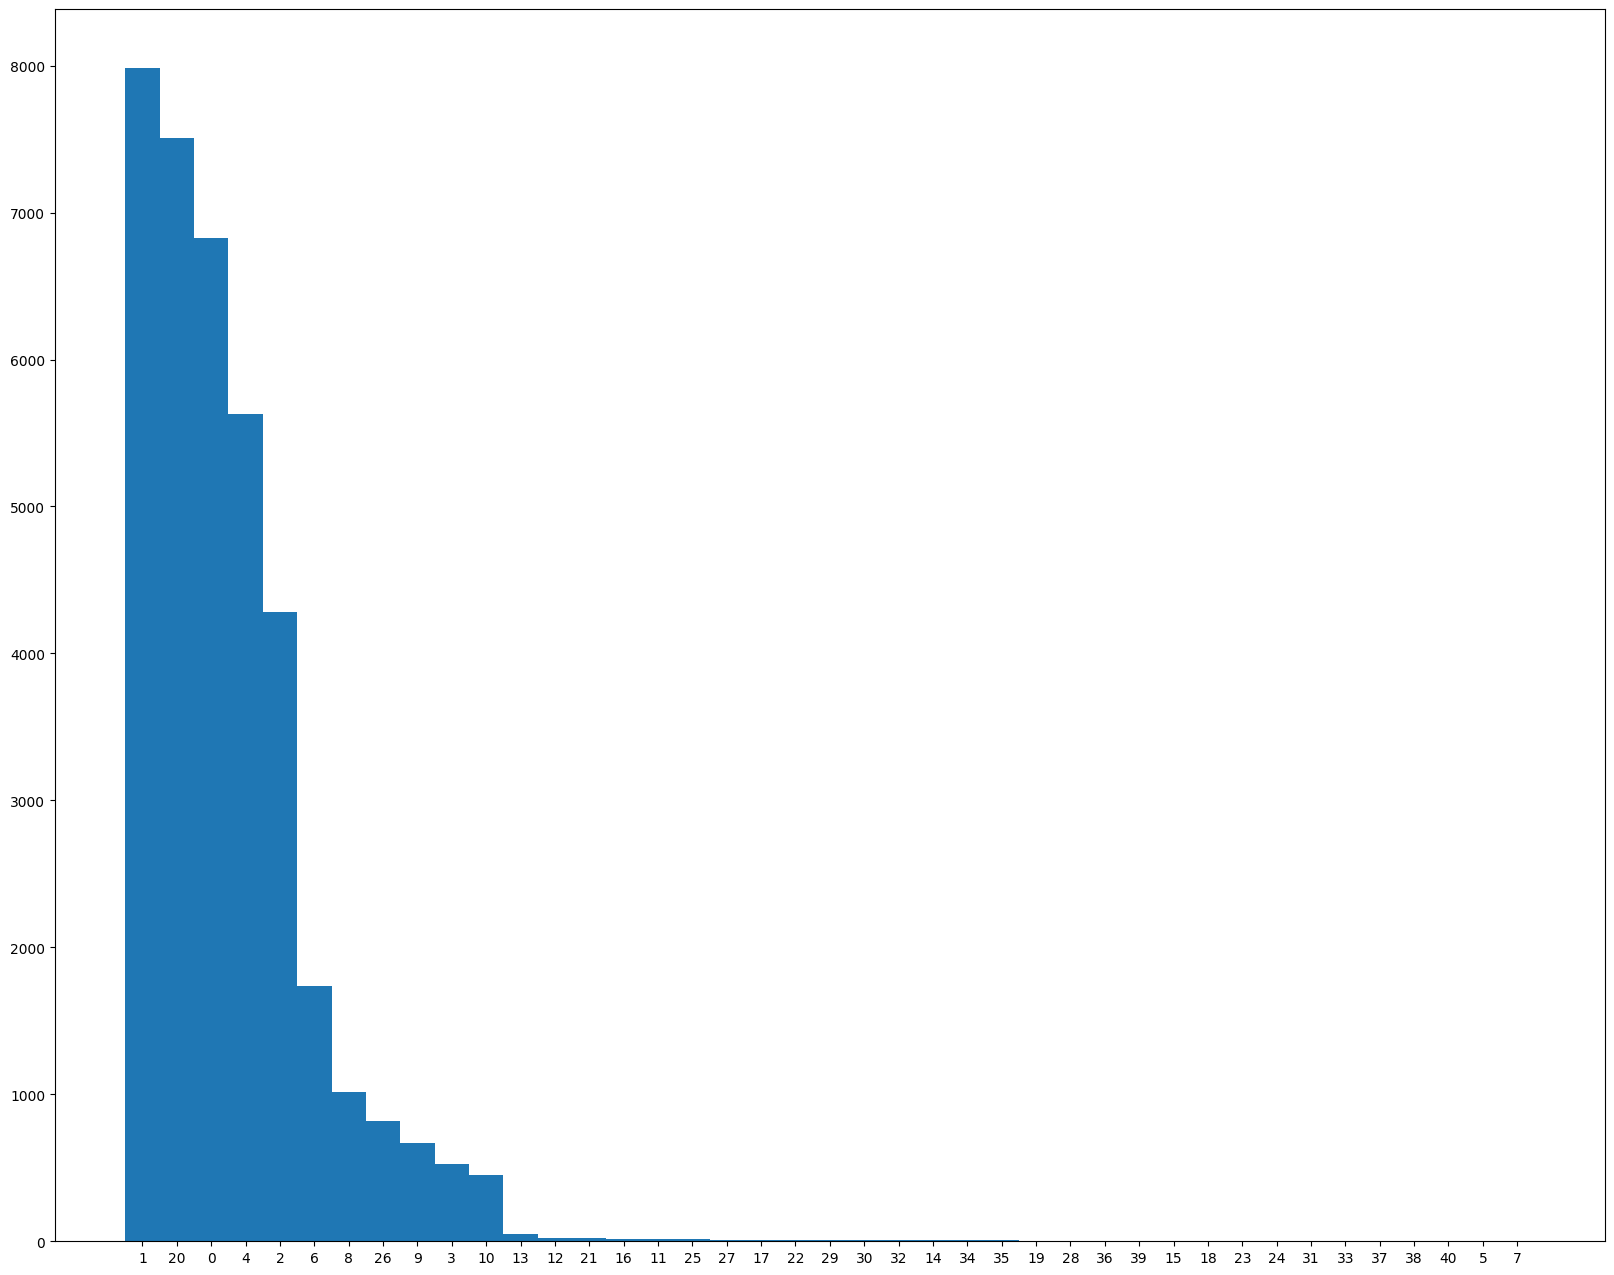

In [ ]:
comm_len = [(c, len(nodes)) for c,nodes in list_community_sets_louvain.items()]
comm_len.sort(key = lambda x: x[1],reverse = True)

plt.figure(figsize = (20,16))
plt.bar(range(len(comm_len)), [x[1] for x in comm_len],width = 1)
plt.xticks(range(len(comm_len)), [x[0] for x in comm_len])

plt.show()

In [ ]:
nx.set_node_attributes(graph, partition_louvain, 'community')

In [ ]:
df_graph = pd.DataFrame.from_dict(graph.nodes, orient='index')
df_graph

,ml-web,community
0,0,0
1,0,1
2,1,2
3,0,3
4,1,4
...,...,...
37695,1,1
37696,0,4
37697,0,0
37698,1,8


In [ ]:
df_graph['Count'] = 1
table = pd.pivot_table(df_graph, values='Count', index=['community'], columns=['ml-web'], aggfunc=np.sum)
table = table.fillna(0)
table

ml-web,0,1
community,,
0,6119.0,708.0
1,6347.0,1637.0
2,4003.0,276.0
3,366.0,160.0
4,5201.0,431.0
5,3.0,0.0
6,1421.0,319.0
7,3.0,0.0
8,771.0,247.0


In [ ]:
table[0] = table[0]/sum(table[0])
table[1] = table[1]/sum(table[1])
round(100*table,1)

ml-web,0,1
community,,
0,21.9,7.3
1,22.7,16.8
2,14.3,2.8
3,1.3,1.6
4,18.6,4.4
5,0.0,0.0
6,5.1,3.3
7,0.0,0.0
8,2.8,2.5


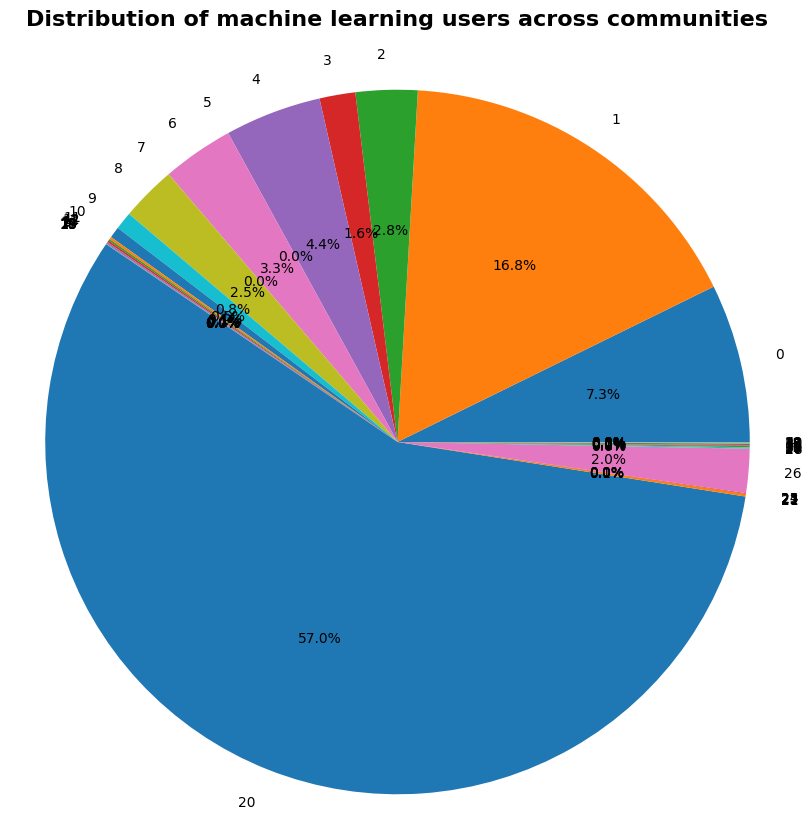

In [ ]:
fig1, ax1 = plt.subplots(figsize =(10, 10))
ax1.pie(100*table[1], labels=table.index, autopct='%1.1f%%')
ax1.axis('equal')
title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title("Distribution of machine learning users across communities\n", fontdict=title_font)
plt.show()

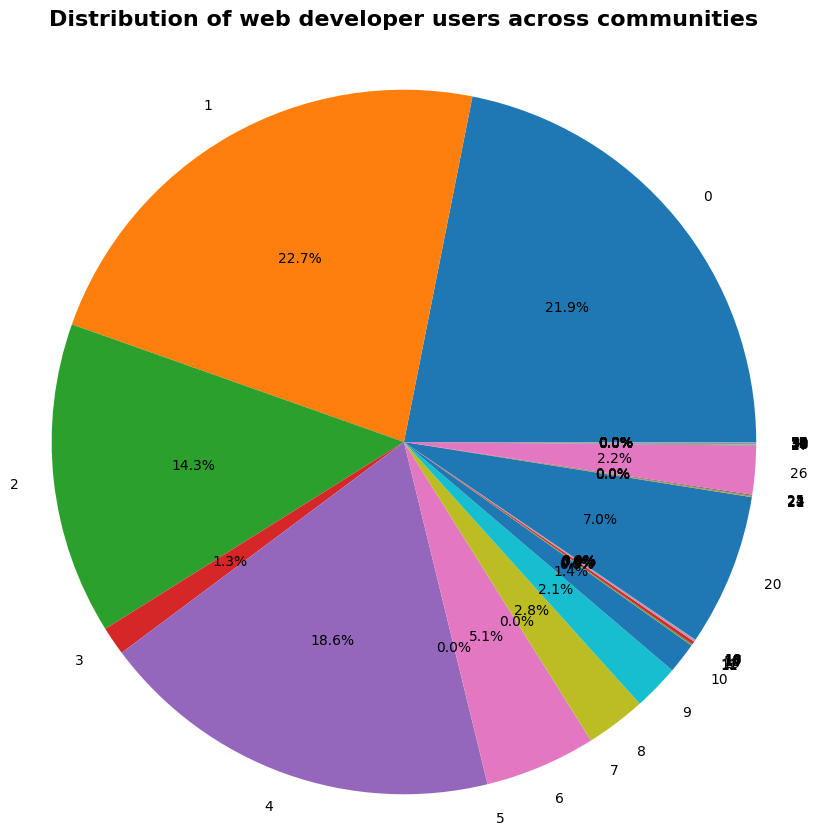

In [ ]:
fig1, ax1 = plt.subplots(figsize =(10, 10))
ax1.pie(100*table[0], labels=table.index, autopct='%1.1f%%')
ax1.axis('equal')
title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title("Distribution of web developer users across communities\n", fontdict=title_font)
plt.show()

In [ ]:
from google.colab import files

nx.write_gexf(G = graph, path = 'github_graph.gexf')

files.download('github_graph.gexf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>